In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import psutil
import warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
df = pd.read_csv("D:\\CIT\\Datasets\\AMZN.csv")
print(df.head())
print(df.columns)

       Date        Open        High         Low   Adj Close    Volume  \
0  1/4/2010  136.250000  136.610001  133.139999  133.899994   7599900   
1  1/5/2010  133.429993  135.479996  131.809998  134.690002   8851900   
2  1/6/2010  134.600006  134.729996  131.649994  132.250000   7178800   
3  1/7/2010  132.009995  132.320007  128.800003  130.000000  11030200   
4  1/8/2010  130.559998  133.679993  129.029999  133.520004   9830500   

        Close  
0  133.899994  
1  134.690002  
2  132.250000  
3  130.000000  
4  133.520004  
Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close'], dtype='object')


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2010-01-04 to 2018-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2265 non-null   float64
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Adj Close  2265 non-null   float64
 4   Volume     2265 non-null   int64  
 5   Close      2265 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 123.9 KB


In [6]:
df.describe()

,Open,High,Low,Adj Close,Volume,Close
count,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03,2265.000000
mean,553.000949,558.568702,546.430821,552.743179,4.603646e+06,552.743179
std,470.155920,474.660681,463.993737,469.357785,2.954860e+06,469.357785
min,105.930000,111.290001,105.800003,108.610001,9.844000e+05,108.610001
25%,217.649994,219.979996,214.460007,217.830002,2.786500e+06,217.830002
50%,334.679993,336.760010,328.940002,332.910004,3.872500e+06,332.910004
75%,766.599976,771.219971,761.200012,767.330017,5.425000e+06,767.330017
max,2038.109985,2050.500000,2013.000000,2039.510010,4.242110e+07,2039.510010


In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Open         0
High         0
Low          0
Adj Close    0
Volume       0
Close        0
dtype: int64


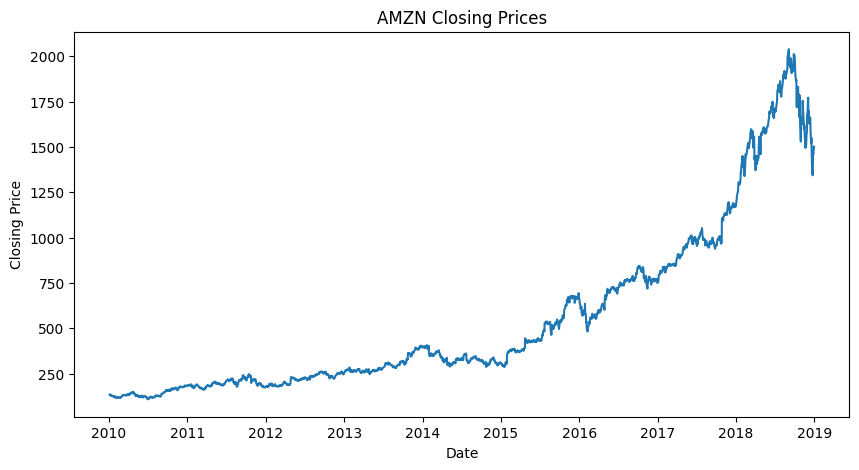

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.title('AMZN Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [10]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [11]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
model = Sequential()
model.add(LSTM(30, activation='tanh', return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(30, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(predictions)

15/15 [==============================] - 1s 3ms/step
[[ 868.3951 ]
 [ 866.83014]
 [ 865.166  ]
 [ 860.2476 ]
 [ 861.9551 ]
 [ 861.25256]
 [ 862.61926]
 [ 869.9357 ]
 [ 881.02484]
 [ 892.3122 ]
 [ 897.77136]
 [ 907.2526 ]
 [ 915.38434]
 [ 921.29694]
 [ 917.9677 ]
 [ 913.97504]
 [ 915.70087]
 [ 918.5951 ]
 [ 912.0349 ]
 [ 908.48773]
 [ 909.4286 ]
 [ 917.2932 ]
 [ 917.0944 ]
 [ 915.257  ]
 [ 917.0886 ]
 [ 918.5585 ]
 [ 923.1196 ]
 [ 925.55457]
 [ 930.77106]
 [ 941.81384]
 [ 952.7215 ]
 [ 962.01074]
 [ 958.68396]
 [ 954.05255]
 [ 954.11523]
 [ 958.42413]
 [ 965.9541 ]
 [ 966.1251 ]
 [ 966.5017 ]
 [ 969.98376]
 [ 976.7939 ]
 [ 973.91144]
 [ 972.9664 ]
 [ 968.0162 ]
 [ 976.9911 ]
 [ 981.5381 ]
 [ 988.59564]
 [ 994.55804]
 [1003.6357 ]
 [1010.7196 ]
 [1011.7566 ]
 [1011.72296]
 [1013.2858 ]
 [1018.5139 ]
 [1023.5251 ]
 [1024.1543 ]
 [1022.74634]
 [1019.96704]
 [1006.44885]
 [ 989.95544]
 [ 988.35785]
 [ 991.9111 ]
 [ 990.1731 ]
 [ 994.00684]
 [1007.0739 ]
 [1011.51654]
 [1013.4635 ]
 [1018.10

In [27]:
actual_close_prices = df['Close'][train_size + time_step + 1:]

lstm_mse = mean_squared_error(actual_close_prices, predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(actual_close_prices, predictions)
lstm_mape = np.mean(np.abs((actual_close_prices - predictions.flatten()) / actual_close_prices)) * 100

print(f'LSTM MSE: {lstm_mse}')
print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
print(f'LSTM MAPE: {lstm_mape}')

LSTM MSE: 2239.551400355488
LSTM RMSE: 47.3238988287682
LSTM MAE: 33.76844064528814
LSTM MAPE: 2.386431952032562


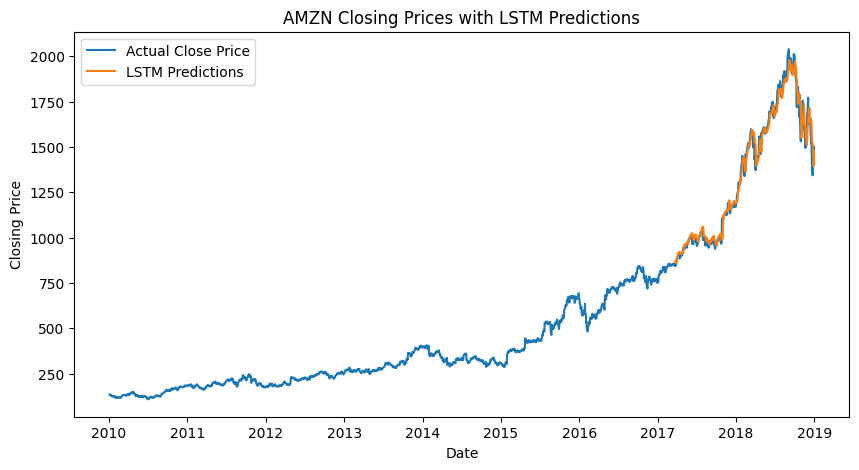

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index[train_size + time_step + 1:], predictions, label='LSTM Predictions')
plt.title('AMZN Closing Prices with LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [29]:
future_time_steps = 365
X_future = X_test[-1].reshape(1, time_step, 1)  

future_predictions = []

start_time = time.time()
process = psutil.Process()

initial_cpu_times = process.cpu_times()
initial_memory_info = process.memory_info()

for i in range(future_time_steps):
    next_prediction = model.predict(X_future[:, i:, :])[0]
    X_future = np.append(X_future, next_prediction.reshape(1, 1, 1), axis=1)
    future_predictions.append(next_prediction[0])

end_time = time.time()
prediction_duration = end_time - start_time

cpu_time = process.cpu_times()
memory = process.memory_info()

cpu_time_user = cpu_time.user - initial_cpu_times.user
cpu_time_system = cpu_time.system - initial_cpu_times.system
memory_usage = memory.rss - initial_memory_info.rss  

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

1/1 [==============================] - 0s 38ms/step


In [30]:
print(f"Prediction duration: {prediction_duration:.2f} seconds")
print(f"CPU time (user): {cpu_time_user:.2f} seconds")
print(f"CPU time (system): {cpu_time_system:.2f} seconds")
print(f"Memory usage: {memory_usage / (1024 * 1024):.2f} MB")

Prediction duration: 32.35 seconds
CPU time (user): 25.17 seconds
CPU time (system): 0.50 seconds
Memory usage: 6.66 MB


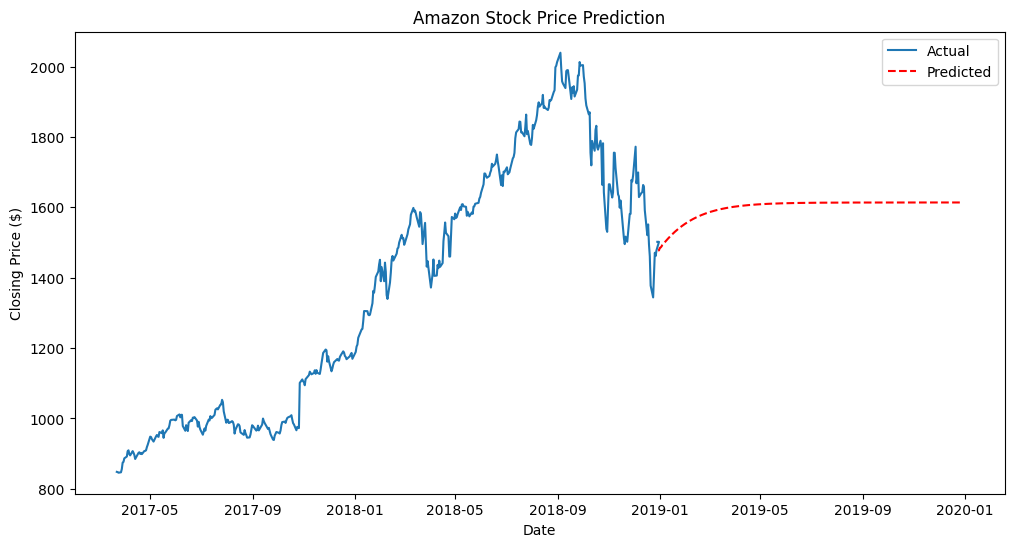

In [31]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_time_steps)

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(X_test):], scaler.inverse_transform(test_data[-len(X_test):]), label='Actual')
plt.plot(future_dates, future_predictions, color='red', linestyle='dashed', label='Predicted')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [32]:
for date, prediction in zip(future_dates, future_predictions):
    print(f'Date: {date.date()} - Predicted Price: ${prediction:.2f}')

Date: 2018-12-30 - Predicted Price: $1476.75
Date: 2018-12-31 - Predicted Price: $1477.77
Date: 2019-01-01 - Predicted Price: $1484.82
Date: 2019-01-02 - Predicted Price: $1485.89
Date: 2019-01-03 - Predicted Price: $1488.85
Date: 2019-01-04 - Predicted Price: $1492.87
Date: 2019-01-05 - Predicted Price: $1495.05
Date: 2019-01-06 - Predicted Price: $1498.07
Date: 2019-01-07 - Predicted Price: $1501.13
Date: 2019-01-08 - Predicted Price: $1503.64
Date: 2019-01-09 - Predicted Price: $1506.44
Date: 2019-01-10 - Predicted Price: $1509.12
Date: 2019-01-11 - Predicted Price: $1511.64
Date: 2019-01-12 - Predicted Price: $1514.21
Date: 2019-01-13 - Predicted Price: $1516.69
Date: 2019-01-14 - Predicted Price: $1519.10
Date: 2019-01-15 - Predicted Price: $1521.49
Date: 2019-01-16 - Predicted Price: $1523.80
Date: 2019-01-17 - Predicted Price: $1526.06
Date: 2019-01-18 - Predicted Price: $1528.29
Date: 2019-01-19 - Predicted Price: $1530.45
Date: 2019-01-20 - Predicted Price: $1532.57
Date: 2019